Series :  3.28636614833


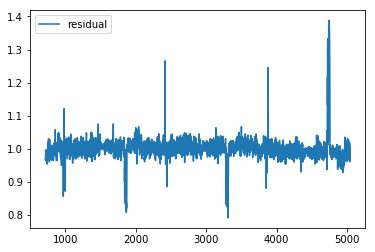

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import math
import numpy as np

coloumn_no = 2

df = pd.read_excel('str_decomposition.xlsx')

series = []
for i in range(len(df)):
    series.append(df.iloc[i,coloumn_no])

print "Series : ", series[0]

result = seasonal_decompose(series, model='multiplicative', freq=1440)
plt.plot(result.resid, label='residual')
plt.legend(loc='upper left')
plt.show()

float('nan')
for val in result.resid:
    if (math.isnan(val)):
        pass
    else:
        pass

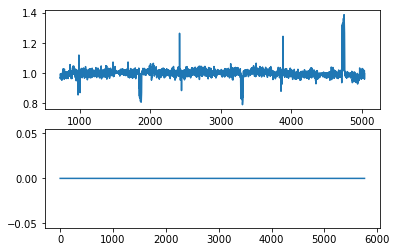

In [5]:
from luminol.anomaly_detector import AnomalyDetector
from datetime import datetime
import pandas as pd
import time
import matplotlib.pyplot as plt

coloumn_no = 0
df = pd.read_excel('str_decomposition.xlsx')
series_1 = []
for i in range(len(df)):
    dt = datetime.strptime((df.iloc[i,coloumn_no]), '%Y-%m-%dT%H:%M:%S.%fZ')
    series_1.append(int(time.mktime(dt.timetuple())))
    
ts = dict(zip(series_1, (result.resid).tolist()))
my_detector = AnomalyDetector(ts)
score = my_detector.get_all_scores()
anom_score = []

for (timestamp, value) in score.iteritems():
    t_str = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(timestamp))
    anom_score.append([t_str, value])

tmp_lst =[]
for score in anom_score:
    #print score
    tmp_lst.append(score[1])


plt.subplot(2, 1, 1)
plt.plot((result.resid).tolist())

plt.subplot(2, 1, 2)
plt.plot(tmp_lst)
plt.show()